In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
dat= pd.read_csv("C://Users/12368/OneDrive/world-happiness-report-2021.csv")
dat

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [26]:
h_data= pd.read_csv("C://Users/12368/OneDrive/Human Development Index and its components 2021.csv")
data_2= dat.sort_values(by= ['Country name'])
h_data_2= h_data.sort_values(by= ['Country'])
data= pd.merge(data_2,h_data_2, left_on=["Country name"], right_on=['Country'])
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Dystopia + residual,HDI rank,Country,Human Development Index (HDI) (Value),Life expectancy at birth(years),Expected years of schooling(years),Mean years of schooling(years),Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank 2019
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,1.895,169,Afghanistan,0.511,64.8,10.2,3.9,"2,229",0,169
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,2.250,69,Albania,0.795,78.6,14.7,10.1,"13,998",18,68
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,2.242,91,Algeria,0.748,76.9,14.6,8.0,"11,174",13,91
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,2.461,46,Argentina,0.845,76.7,17.7,10.9,"21,190",16,46
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,2.127,81,Armenia,0.776,75.1,13.1,11.3,"13,894",9,72


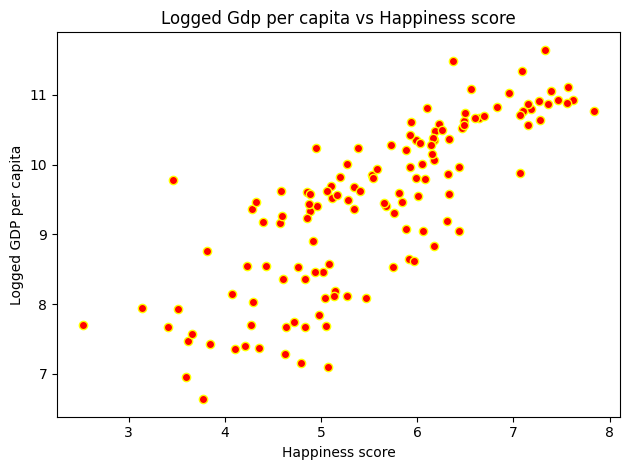

The pearsorn correlation between Ladder score and Logged GDP per capita is 0.8036033187770072
The spearman correlation between Ladder score and Logged GDP per capita is 0.8359750653600907


In [15]:
x1= data["Ladder score"]
x2= data["Logged GDP per capita"]
plt.scatter(x1,x2, color="red", edgecolors="yellow")
plt.title("Logged Gdp per capita vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Logged GDP per capita")
plt.tight_layout()
plt.show()
pc,_= st.pearsonr(x1,x2)
sc,_= st.spearmanr(x1,x2)
print("The pearsorn correlation between Ladder score and Logged GDP per capita is",pc)
print("The spearman correlation between Ladder score and Logged GDP per capita is",sc)

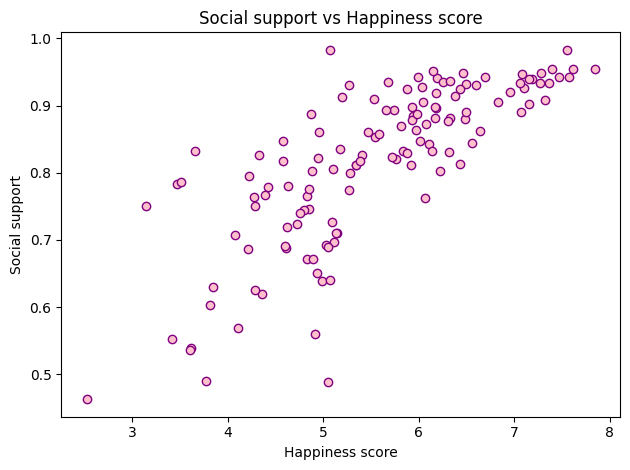

The pearsorn correlation between Ladder score and Social support is 0.7706100673147324
The spearman correlation between Ladder score and Social support is 0.8101090641869714


In [16]:
x1 = data["Ladder score"]
x2 = data["Social support"]
plt.scatter(x1, x2, color="pink", edgecolors="purple")
plt.title("Social support vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Social support")
plt.tight_layout()
plt.show()
pc, _ = st.pearsonr(x1, x2)
sc, _ = st.spearmanr(x1, x2)
print("The pearsorn correlation between Ladder score and Social support is", pc)
print("The spearman correlation between Ladder score and Social support is", sc)

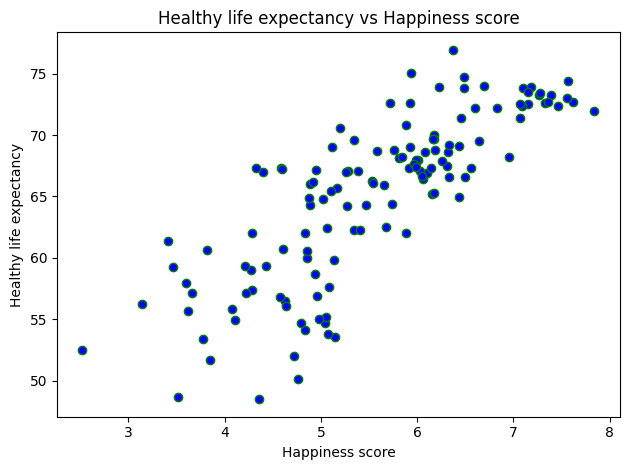

The pearsorn correlation between Ladder score and Healthy life expectancy is 0.8019112248566798
The spearman correlation between Ladder score and Healthy life expectancy is 0.8290082144033314


In [36]:
x1 = data["Ladder score"]
x2 = data["Healthy life expectancy"]
plt.scatter(x1, x2, color="blue", edgecolors="green")
plt.title("Healthy life expectancy vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Healthy life expectancy")
plt.tight_layout()
plt.show()
pc, _ = st.pearsonr(x1, x2)
sc, _ = st.spearmanr(x1, x2)
print("The pearsorn correlation between Ladder score and Healthy life expectancy is", pc)
print("The spearman correlation between Ladder score and Healthy life expectancy is", sc)

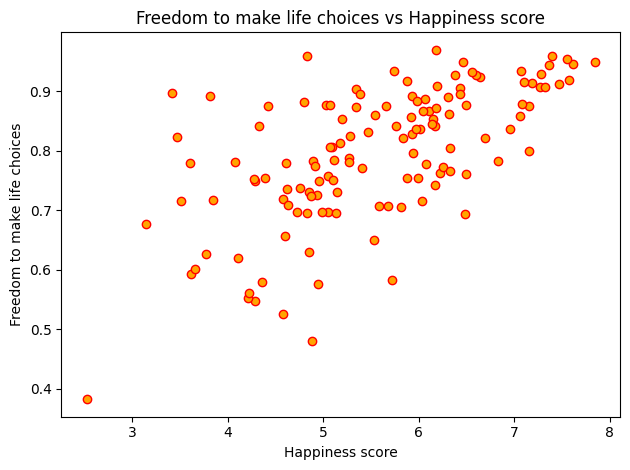

The pearsorn correlation between Ladder score and Freedom to make life choices is 0.6287378664735269
The spearman correlation between Ladder score and Freedom to make life choices is 0.632233456743653


In [18]:
x1 = data["Ladder score"]
x2 = data["Freedom to make life choices"]
plt.scatter(x1, x2, color="orange", edgecolors="red")
plt.title("Freedom to make life choices vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Freedom to make life choices")
plt.tight_layout()
plt.show()
pc, _ = st.pearsonr(x1, x2)
sc, _ = st.spearmanr(x1, x2)
print("The pearsorn correlation between Ladder score and Freedom to make life choices is", pc)
print("The spearman correlation between Ladder score and Freedom to make life choices is", sc)

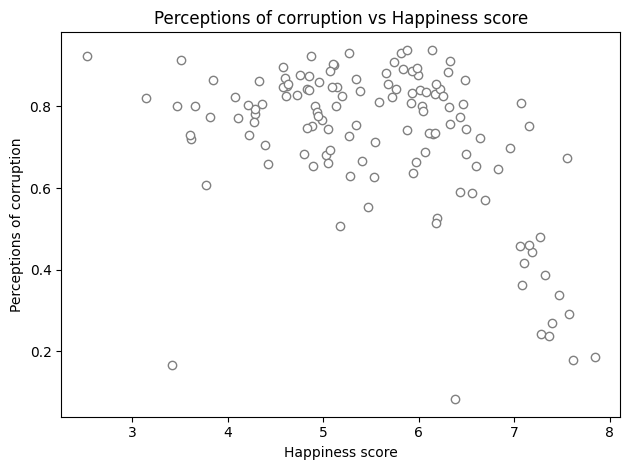

The pearsorn correlation between Ladder score and Perceptions of corruption is -0.4726344124223121
The spearman correlation between Ladder score and Perceptions of corruption is -0.3798346468298415


In [19]:
x1 = data["Ladder score"]
x2 = data["Perceptions of corruption"]
plt.scatter(x1, x2, color="White", edgecolors="grey")
plt.title("Perceptions of corruption vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Perceptions of corruption")
plt.tight_layout()
plt.show()
pc, _ = st.pearsonr(x1, x2)
sc, _ = st.spearmanr(x1, x2)
print("The pearsorn correlation between Ladder score and Perceptions of corruption is", pc)
print("The spearman correlation between Ladder score and Perceptions of corruption is", sc)

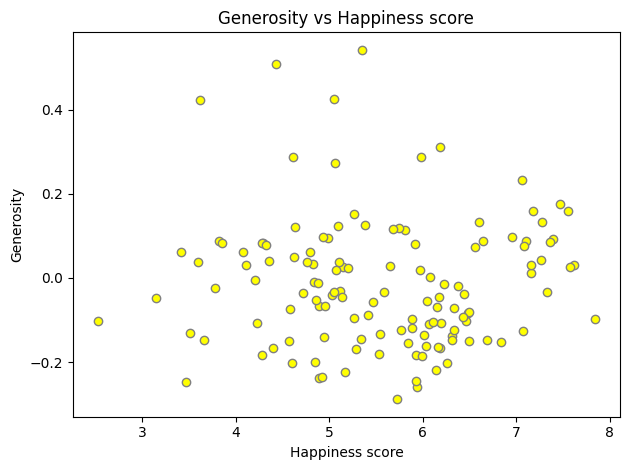

The pearsorn correlation between Ladder score and Generosity is -0.00539870297225801
The spearman correlation between Ladder score and Generosity is 0.013582118641308283


In [20]:
x1 = data["Ladder score"]
x2 = data["Generosity"]
plt.scatter(x1, x2, color="Yellow", edgecolors="grey")
plt.title("Generosity vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Generosity")
plt.tight_layout()
plt.show()
pc, _ = st.pearsonr(x1, x2)
sc, _ = st.spearmanr(x1, x2)
print("The pearsorn correlation between Ladder score and Generosity is", pc)
print("The spearman correlation between Ladder score and Generosity is", sc)

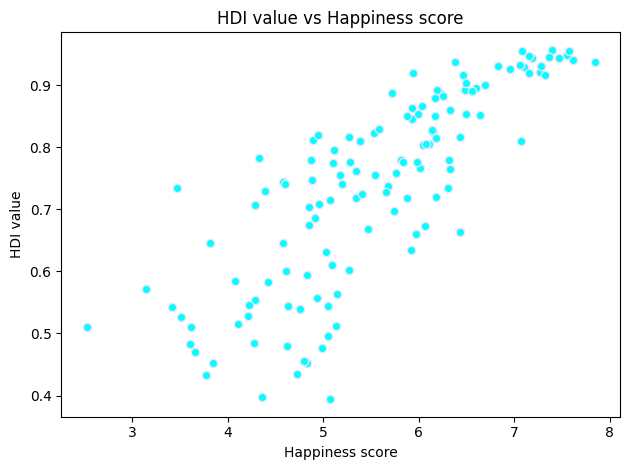

The pearsorn correlation between Ladder score and HDI value is 0.8090201269061998
The spearman correlation between Ladder score and HDI value is 0.8419637985253123


In [21]:
x1 = data["Ladder score"]
x2 = data["Human Development Index (HDI) (Value)"]
plt.scatter(x1, x2, color="Aqua", edgecolors="lavender")
plt.title("HDI value vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("HDI value")
plt.tight_layout()
plt.show()
pc, _ = st.pearsonr(x1, x2)
sc, _ = st.spearmanr(x1, x2)
print("The pearsorn correlation between Ladder score and HDI value is", pc)
print("The spearman correlation between Ladder score and HDI value is", sc)

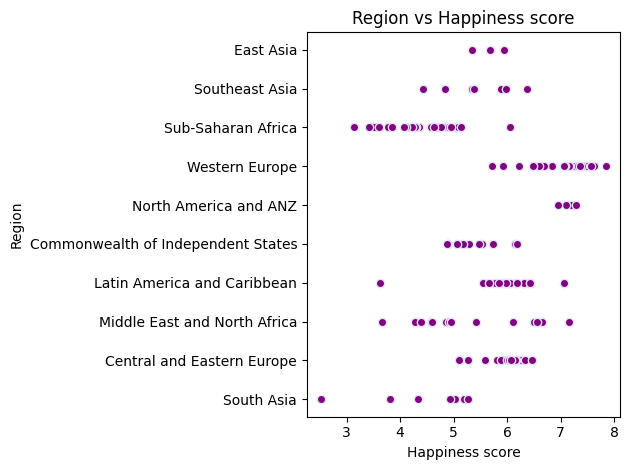

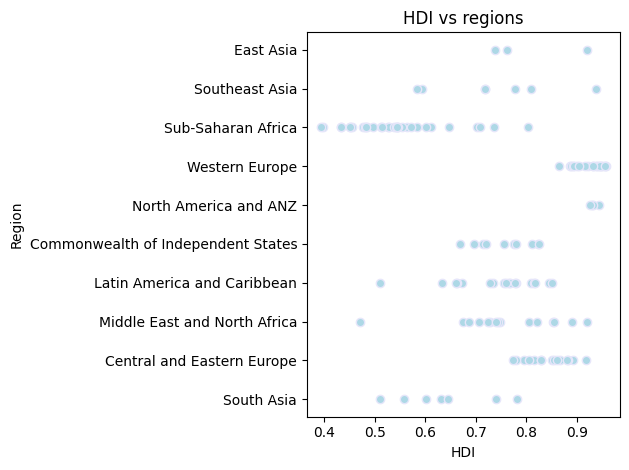

In [25]:
x1 = data["Ladder score"]
x2= data['Regional indicator']
plt.scatter(x1, x2, color="Purple", edgecolors="lavender")
plt.title("Region vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

x1 = data["Human Development Index (HDI) (Value)"]
x2 = data['Regional indicator']
plt.scatter(x1, x2, color="Lightblue", edgecolors="lavender")
plt.title("HDI vs regions")
plt.style.use("fast")
plt.xlabel("HDI")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

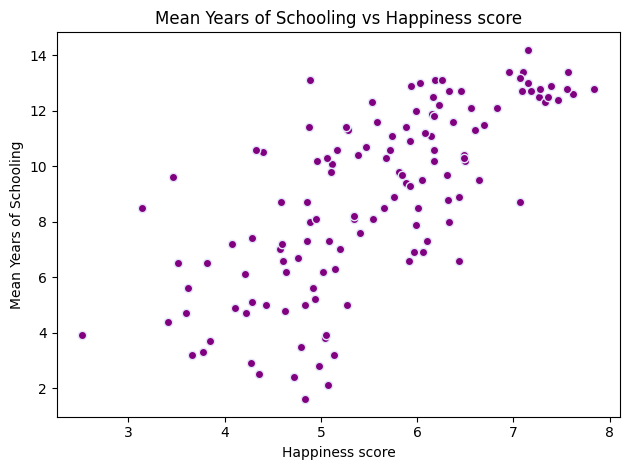

The pearsorn correlation between Ladder score and mean years of schooling value is 0.7154739237685708
The spearman correlation between Ladder score and mean years of schooling value is 0.7400100160449951


In [33]:
x1 = data["Ladder score"]
x2= data['Mean years of schooling(years)']
plt.scatter(x1, x2, color="Purple", edgecolors="lavender")
plt.title("Mean Years of Schooling vs Happiness score")
plt.style.use("fast")
plt.xlabel("Happiness score")
plt.ylabel("Mean Years of Schooling")
plt.tight_layout()
plt.show()
pc, _ = st.pearsonr(x1, x2)
sc, _ = st.spearmanr(x1, x2)
print("The pearsorn correlation between Ladder score and mean years of schooling value is", pc)
print("The spearman correlation between Ladder score and mean years of schooling value is", sc)

In [37]:
Y= data["Ladder score"].values.reshape(-1,1)
X1= data[["Human Development Index (HDI) (Value)","Healthy life expectancy","Logged GDP per capita","Perceptions of corruption","Generosity","Social support","Freedom to make life choices", "Mean years of schooling(years)"]]
X1_TR,X1_TE,Y_TR,Y_TE= train_test_split(X1,Y, test_size=0.2, random_state=0)
L= LinearRegression()
mod= L.fit(X1_TR,Y_TR)
Yhat= mod.predict(X1_TE)
mod.score(X1_TE,Y_TE)

0.7372368217417299